In [ ]:
import earthkit as ekt
ds = ekt.data.from_source("ecmwf-open-data",
        source='aws',
        model='ifs',
        param=["2t"],
        step=[24],
       )
ds_xr_earthkit = ds.to_xarray()
ds_xr_cfgrib = ds.to_xarray(engine='cfgrib')

From version 0.11.0 the default engine for to_xarray is 'earthkit'. Use engine=`cfgrib` to invoke the cfgrib engine.


In [4]:
print(ds_xr_earthkit)
print(ds_xr_cfgrib)

<xarray.Dataset> Size: 8MB
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
Data variables:
    2t         (latitude, longitude) float64 8MB ...
Attributes: (12/15)
    param:          2t
    standard_name:  air_temperature
    long_name:      2 metre temperature
    paramId:        167
    class:          od
    stream:         scda
    ...             ...
    date:           20241209
    time:           600
    domain:         g
    levelist:       2
    Conventions:    CF-1.8
    institution:    ECMWF
<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2024-12-09T06:00:00
  * step               (step) timedelta64[ns] 8B 1 days
  * heightAboveGround  (heightAboveGroun

In [ ]:
nearest_value_cfgrib = (ds_xr_cfgrib['t2m'].sel(latitude=35, longitude=-90, method='nearest').item())
nearest_value_earthkit = (ds_xr_earthkit['2t'].sel(latitude=35, longitude=-90, method='nearest').item())
print(nearest_value_cfgrib)
print(nearest_value_earthkit)

In [9]:
import earthkit as ekt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
ds = ekt.data.from_source("ecmwf-open-data",
        source='aws',
        model='ifs',
        param=["10u", "10v"],
        step=[24],
       )
crs = ccrs.PlateCarree()
domain_bounds = [-107,-89,32,50]
ds_xr = ds.to_xarray()
ds_xr = ds_xr.coarsen(latitude=4, longitude=4, boundary='trim').mean()
lon = ds_xr.longitude.values  # Replace 'longitude' with the actual coordinate name
lat = ds_xr.latitude.values   # Replace 'latitude' with the actual coordinate name
u10 = ds_xr['10u'].values        # Replace '10u' with the actual variable name
v10 = ds_xr['10v'].values

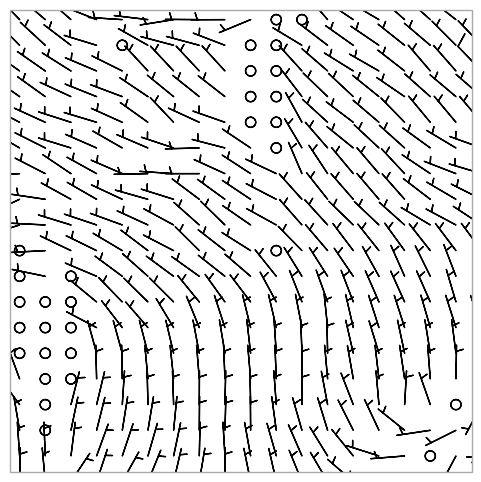

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': crs})
ax.barbs(lon, lat, u10, v10)
ax.set_extent(domain_bounds)

AttributeError: 'NumpySource' object has no attribute 'u_values'

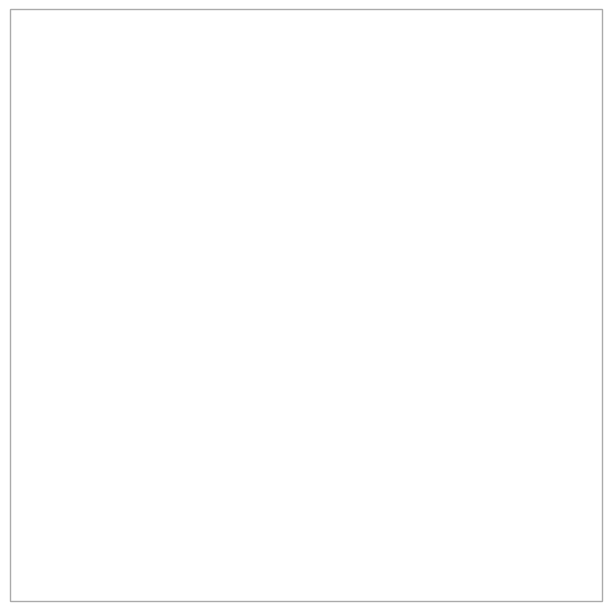

In [11]:
chart = ekt.plots.Map(domain=domain_bounds, crs=crs)
chart.barbs(lon, lat, u10, v10)